In [2]:
from master import *

In [3]:
fq1 = prefix+'H2qq-CF3.0CA3.0-sq0100-esq0011/total.root'
fq2 = prefix+'H2qq-CF3.0CA3.0-sq0100-esq0000/total.root'
X,Y = tools.pre_process(fq1,fq2,nev_max=50000)
z = np.array([[p[0] for p in jet] for jet in X])
mults = [np.sum([1 if zi > 0 else 0 for zi in jet]) for jet in z]
optimal = an.nk(z,1) + an.nk(z,2)

Finished preprocessing at 45.9274582862854


In [5]:
pfn, pfn_roc, pfn_auc = tools.train_qg_pfn(X,Y,n_epoch=3,summary=False)
pfn_z, pfn_z_roc, pfn_z_auc = tools.train_qg_pfn_no_angular(X,Y,n_epoch=3,summary=False)
pfn_noz, pfn_noz_roc, pfn_noz_auc = tools.train_qg_pfn_only_angular(X,Y,n_epoch=3,summary=False)
efn, efn_roc, efn_auc = tools.train_qg_efn(X,Y,n_epoch=3,summary=False)

Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3


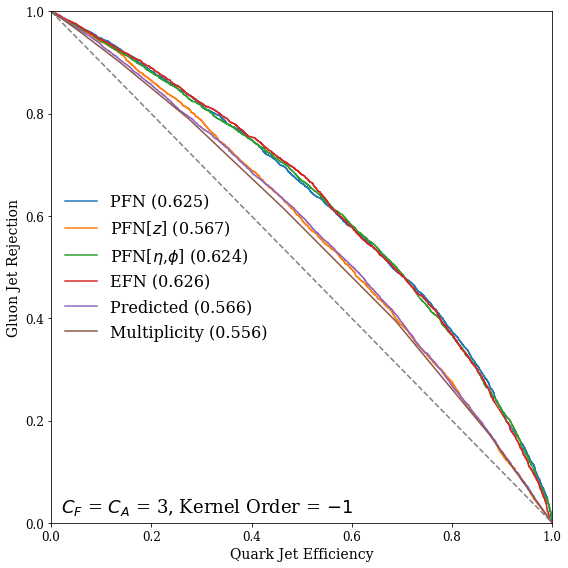

In [6]:
optimal_roc = roc_curve(Y[:,1],-optimal)
optimal_auc = roc_auc_score(Y[:,1],-optimal)
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
rocs = [pfn_roc,pfn_z_roc,pfn_noz_roc,efn_roc,optimal_roc,mult_roc]
aucs = [pfn_auc,pfn_z_auc,pfn_noz_auc,efn_auc,optimal_auc,mult_auc]
labels = ["PFN",r"PFN[$z$]",r"PFN[$\eta$,$\phi$]","EFN","Predicted","Multiplicity"]
plotting.plot_many(rocs,aucs,labels)